# O Problema

Neste notebook encontra-se um exemplo clássico de *machine learning*, disponível publicamente em: 'https://www.kaggle.com/camnugent/california-housing-prices'. O conjunto de dados é referente à informações de habitação da Califórnia, do Censo dos Estados Unidos de 1990, possuindo mais de 20 mil registros. 

A tabela a seguir fornece as descrições dos dados:

| Atributo | Descrição | Tipo |
| --- | --- | --- |
| Logitude | Longitude da região | float  |
|latitude | latitude da região | float|
| housing_median_age| mediana da idade das casas na região | float |
|total_rooms|total de comodos na região|float|
|total_dedrooms| total de quartos na região| float|
|populations|população da região| float|
|households| número total de casas na região| float|
|median_income| mediana da renda das pessoas na região (em dezenas de milhares de dólares por ano)| float|
|ocean_proximity|proximidade com o ocenao| string |
|median_house_value| mediana dos valores das casas da região| float|

Nosso objetivo é construir um modelo que faça a previsão da mediana do valor da casa com base em outros parâmetros do conjunto de dados.

## Os dados

In [21]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#carregando os dados
dados = pd.read_csv('housing.csv')
df = pd.DataFrame(dados)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

## Preparação dos dados

Nesta seção, vamos preparar nossos dados para trabalharmos com machine learning.

In [24]:
#Verificando a existência de valores nulos
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Há 207 registros com total de comodos nulos. Como nosso objetivo é criar um modelo preditivo, vamos eliminar esses registros.

In [30]:
df.dropna(inplace=True)

In [32]:
df.duplicated().sum()

0

Deste modo, nosso conjunto dados está livre de dados nulos e duplicados. Contudo, a coluna `ocean_proximity` possui dados qualitativos e a maioria dos algoritmos de machine learning trabalha apenas com dados quantitativos. Para resolver esse problema, vamos agora fazer a conversão de dados usando um recurso da biblioteca SciKit Learn.

In [35]:
from sklearn.preprocessing import LabelEncoder  
conversao = LabelEncoder().fit_transform(df['ocean_proximity'])
df['ocean_proximity_num'] = conversao
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_num
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


## Análise exploratória

Nesta seção, vamos obter alguns dados estatísticos sobre os dados apresentados. Primeiramente, vamos obter as informações de medidas centrais de cada atributo.

In [41]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_num
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


As informações estatisticas levantadas acima nos dão uma ideia das medidas de posição dos conjuntos habitacionais (quarteirões) registrados. Observe que a mediana da mediana da idade das casas é de 18 anos, que a mediana do número de habitantes é 787 pessoas, mediana da mediana do valor das casas é de aproximadamente $ 180 mil. 

Primeiro, vamos plotar os gráficos de distribuição de alguns parâmetros

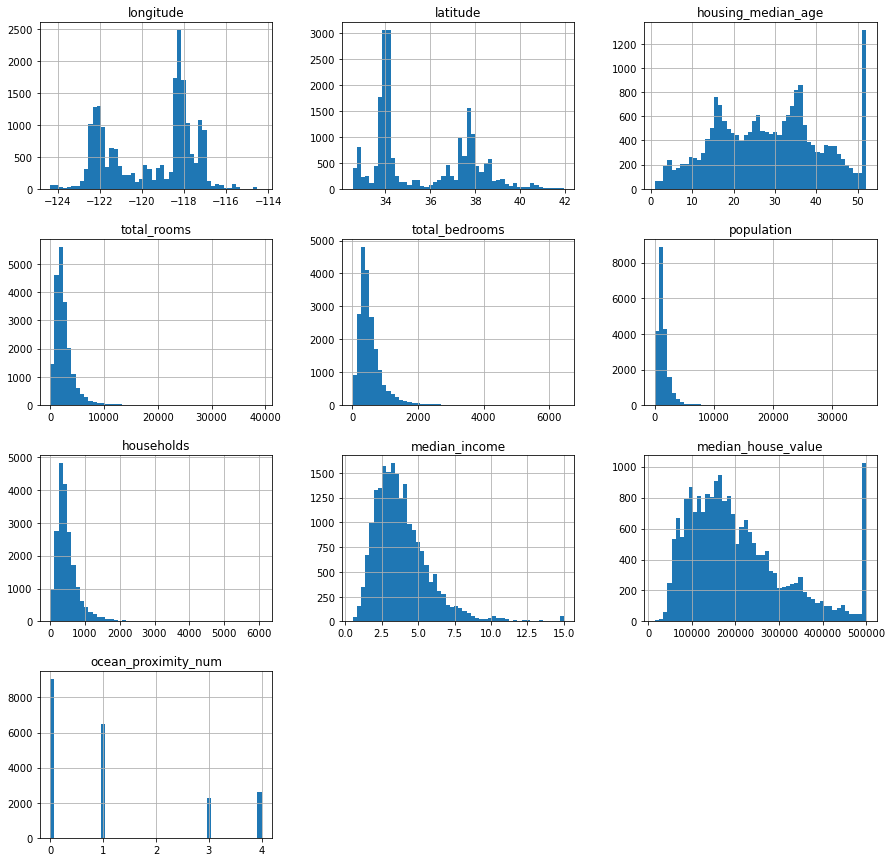

In [56]:
df.hist(bins=50, figsize=(15,15))
plt.show()

Para termos uma ideia da distribuição geográfica das habitações, vamos plotar gráficos de dispersão referentes a posição (latitude e longitude) classificando em relação ao preço e a proximidade com o oceano.

<Figure size 1080x504 with 0 Axes>

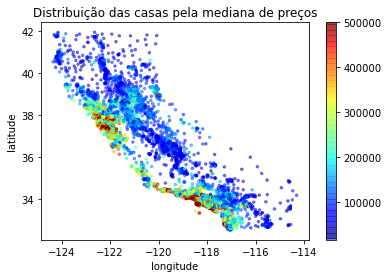

In [57]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(15,7))
cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])
f, ax = plt.subplots()
points = ax.scatter(df['longitude'], df['latitude'], c=df['median_house_value'],
                    s=6, cmap=plt.get_cmap("jet"), label="population", alpha=0.5)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Distribuição das casas pela mediana de preços')
f.colorbar(points)

<Figure size 1080x504 with 0 Axes>

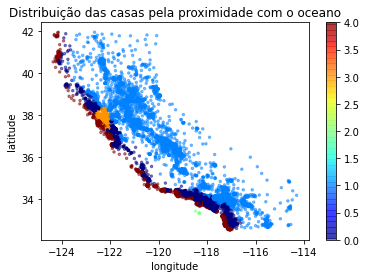

In [54]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(15,7))
cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])
f, ax = plt.subplots()
points = ax.scatter(df['longitude'], df['latitude'], c=df['ocean_proximity_num'],
                    s=6, cmap=plt.get_cmap("jet"), label="population", alpha=0.5)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Distribuição das casas pela proximidade com o oceano')
f.colorbar(points)

Os gráficos acima nos mostram que pode haver uma correlação entre o valor da mediana das casas está relacionado com o a proximidade com o mar.

Vamos, agora, verificar a existência de correlação entre os atributos. 

<ipython-input-58-8795eeac3e92>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filtro = np.triu(np.ones_like(df.corr(),dtype=np.bool))


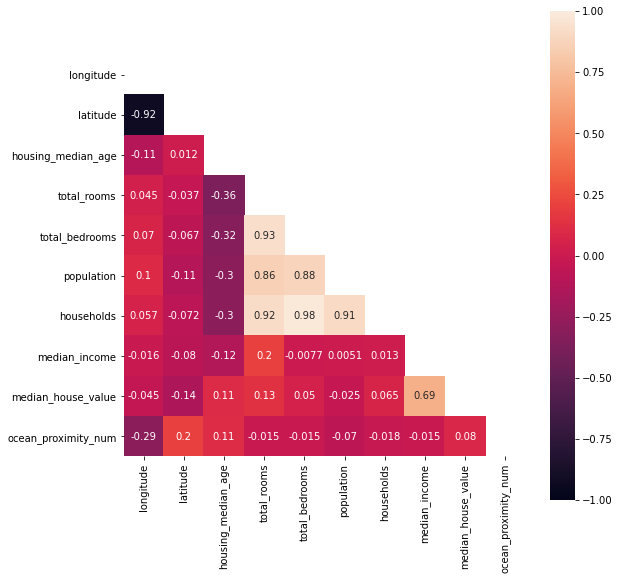

In [58]:
#Mapa de calor para correlação de dados
filtro = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), mask=filtro, square=True, annot=True,vmin=-1,vmax=1)
plt.show()

Observamos a existência de uma correlação forte entre a variável *households* com as variáveis *total_rooms*, *total bedrooms*, *population*. (O que já era esperado, pois se há mais casas, há mais pessoas, mais cômodos e mais quartos). Observamos também a existência de uma correlação mais fraca entre as variáveis *median_house_value* com *median_income*.

## Predição de dados

Primeiramente, vamos separar nossos dados em treino e teste na proporção 75/25.

In [90]:
from sklearn.model_selection import train_test_split
treino, teste = train_test_split(df, train_size=0.75)

Agora, vamos escolher as variáveis dependentes e independentes do nosso treinamento.

In [91]:
parametros = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_num']

X_treino = treino[parametros]
y_treino = treino['median_house_value']

X_teste = teste[parametros]
y_teste = teste['median_house_value']

Neste exemplo, vamos utilizar diversos algoritmos de machine learning e comparar os resultados.

### KNN Regressor

KNN é um algoritmo de machine learning que utiliza métodos de aprendizagem baseado em vizinhos. Este algoritmo é utilizado para classificação e regressão. O KNN consiste em encontrar um número predefinido de amostras (k) de treinamento mais próximas em distância do novo ponto e prever o rótulo a partir deles. 
A distância, em geral é a métrica euclidiana. Mas pode ser escolhidas outras métricas.

No KNN Regressor o rótulo de um ponto de consulta é calculado a partir da média dos rótulos dos vizinhos mais próximos.



In [92]:
from sklearn.neighbors import KNeighborsRegressor
modelo1 = KNeighborsRegressor(3) #Utiliza os 3 elementos mais próximos

In [93]:
#Treinando o modelo
modelo1.fit(X_treino, y_treino)

KNeighborsRegressor(n_neighbors=3)

In [94]:
#Validação do modelo
from sklearn import metrics
predicao_treino = modelo1.predict(X_treino)
predicao_teste = modelo1.predict(X_teste)
print('Média de erro relativo no treino: {0:.4f} '.format( metrics.mean_absolute_percentage_error(y_treino,predicao_treino )))
print('Média de erro relativo no teste: {0:.4f} '.format( metrics.mean_absolute_percentage_error(y_teste,predicao_teste )))

Média de erro relativo no treino: 0.3624 
Média de erro relativo no teste: 0.5174 


### Decision Trees

Decision Trees (DTs) são um tipo de algoritmo de machine learning de aprendizado supervisionado usado para regressão e classificação. O objetivo é criar um modelo que preveja uma variável de destino, a partir de regras de descisão simples inferidas aos dados. 

Vantagens:
*   Simples de entender e vizualizar
*   Requer pouca preparação dos dados
*   Custo de programação é logaritmico
*   Capaz de lidar com dados numéricos e categóricos

Desvantagens:
*   Podem ser criadas árvores excessivamente complexas, que não generalizam os dados
*   As árvores podem ser instáveis, por pequenas variações nos dados.
*   As previsões por árvores não são suaves e nem contínuas.

Dicas de uso:
*    Considere reduzir a dimensionalidade de antemão para dar uma chance melhor a sua árvore, para encontrar recursos mais discriminatórios.
*    Vizualize a sua árvore enquanto a treina.
*    Use `max_depth = 3` como profundidade inicial da árvore para ver como ela se ajusta aos dados e depois vá aumentando a profundidade.
*    Tente `min_samples_leaf=5`como um valor inicial. `

In [95]:
#Escolhendo o algoritmo
from sklearn.tree import DecisionTreeRegressor
modelo2 = DecisionTreeRegressor(random_state = 1, min_samples_leaf=15, max_depth= 10)

In [96]:
#Treinando o modelo
modelo2.fit(X_treino,y_treino)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, random_state=1)

In [97]:
#Predizendo os dados
predicao_treino = modelo2.predict(X_treino)
predicao_teste = modelo2.predict(X_teste)
print('Média de erro relativo no treino: {0:.4f} '.format( metrics.mean_absolute_percentage_error(y_treino,predicao_treino )))
print('Média de erro relativo no teste: {0:.4f} '.format( metrics.mean_absolute_percentage_error(y_teste,predicao_teste )))

Média de erro relativo no treino: 0.1958 
Média de erro relativo no teste: 0.2298 


### Ensemble methods

O objetivo dos *ensemble methods* é combinar a previsão de vários estimadores de base construídos com um determinado algoritmo de aprendizagem, a fim de melhorar generalização sobre um único estimador.

#### RandomForest

O *Random Forest* cada árvore no conjunto é construída a partir de uma amostra retirada do conunto de treinamento. Ao dividir cada nó durante a construção de uma árvore, a melhor divisão é encontrada em todos os recursos de entrada.

In [98]:
from sklearn.ensemble import RandomForestRegressor
modelo3 = RandomForestRegressor (random_state = 1, n_jobs = -1, n_estimators = 50)

In [99]:
#Treinando o modelo
modelo3.fit(X_treino,y_treino)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=1)

In [100]:
#Predizendo os dados
predicao_treino = modelo3.predict(X_treino)
predicao_teste = modelo3.predict(X_teste)
print('Média de erro relativo no treino: {0:.4f} '.format( metrics.mean_absolute_percentage_error(y_treino,predicao_treino )))
print('Média de erro relativo no teste: {0:.4f} '.format( metrics.mean_absolute_percentage_error(y_teste,predicao_teste )))

Média de erro relativo no treino: 0.0681 
Média de erro relativo no teste: 0.1846 


Observamos que o algoritmo RandomForestRegressor possui a menor média de erro relativo entre os algoritmos testados. Ele será nosso candidato.

In [102]:
#Salvando o modelo.
import pickle
filename = 'modelotreinado.sav'
pickle.dump(modelo3,open(filename,'wb'))